In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.feature_selection import chi2

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning lab/Dataset/PCA_IRISH2.csv")
df

,ID,A,B,C,Species
0,0,-0.630361,0.111556,-0.016993,Iris-setosa
1,1,-0.623546,-0.100313,-0.047120,Iris-setosa
2,2,-0.669793,-0.047220,0.021648,Iris-setosa
3,3,-0.654633,-0.098791,0.025214,Iris-setosa
4,4,-0.648263,0.137558,0.016813,Iris-setosa
...,...,...,...,...,...
145,145,0.551755,0.058990,0.085968,Iris-virginica
146,146,0.406278,-0.172227,-0.003916,Iris-virginica
147,147,0.447293,0.036996,0.049336,Iris-virginica
148,148,0.489218,0.149121,0.238719,Iris-virginica


In [ ]:
df.head()

,ID,A,B,C,Species
0,0,-0.630361,0.111556,-0.016993,Iris-setosa
1,1,-0.623546,-0.100313,-0.047120,Iris-setosa
2,2,-0.669793,-0.047220,0.021648,Iris-setosa
3,3,-0.654633,-0.098791,0.025214,Iris-setosa
4,4,-0.648263,0.137558,0.016813,Iris-setosa


In [ ]:
df.dtypes

ID           int64
A          float64
B          float64
C          float64
Species     object
dtype: object

In [ ]:
df.nunique()

ID         150
A          147
B          147
C          147
Species      3
dtype: int64

In [ ]:
df = df.drop(columns=['ID'], axis=1)
print(df)


            A         B         C         Species
0   -0.630361  0.111556 -0.016993     Iris-setosa
1   -0.623546 -0.100313 -0.047120     Iris-setosa
2   -0.669793 -0.047220  0.021648     Iris-setosa
3   -0.654633 -0.098791  0.025214     Iris-setosa
4   -0.648263  0.137558  0.016813     Iris-setosa
..        ...       ...       ...             ...
145  0.551755  0.058990  0.085968  Iris-virginica
146  0.406278 -0.172227 -0.003916  Iris-virginica
147  0.447293  0.036996  0.049336  Iris-virginica
148  0.489218  0.149121  0.238719  Iris-virginica
149  0.312079 -0.031151  0.118672  Iris-virginica

[150 rows x 4 columns]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc=OrdinalEncoder()

In [ ]:
df.columns

Index(['A', 'B', 'C', 'Species'], dtype='object')

In [ ]:
enc.fit(df[['A', 'B', 'C',
       'Species']])

OrdinalEncoder()

In [ ]:
df[['A', 'B', 'C',
       'Species']]=enc.transform(df[['A', 'B', 'C',
       'Species']])

In [ ]:
df.head()

,A,B,C,Species
0,16.0,109.0,59.0,0.0
1,22.0,38.0,46.0,0.0
2,7.0,60.0,86.0,0.0
3,10.0,39.0,89.0,0.0
4,11.0,118.0,80.0,0.0


In [ ]:
df.nunique()

A          147
B          147
C          147
Species      3
dtype: int64

**Pearson correlation**

In [ ]:
X=df.iloc[:, 0:3]
Y=df.iloc[:, -1]

In [ ]:
X.head()

,A,B,C
0,16.0,109.0,59.0
1,22.0,38.0,46.0
2,7.0,60.0,86.0
3,10.0,39.0,89.0
4,11.0,118.0,80.0


[]

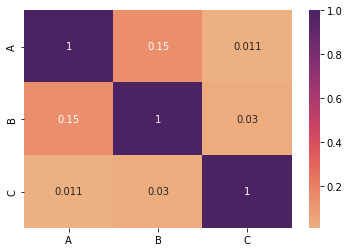

In [ ]:
sns.heatmap(X.corr(), annot=True, cmap='flare')
plt.plot()

**Chi square**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state = 21)

In [ ]:
f_score = chi2(X_train, y_train) 

In [ ]:
f_score


(array([2807.71315614,  357.00742301,   94.10201429]),
 array([0.00000000e+00, 2.99794108e-78, 3.68135102e-21]))

In [ ]:

f_score[1]


array([0.00000000e+00, 2.99794108e-78, 3.68135102e-21])

In [ ]:
pvalues =pd.Series(f_score[1])
pvalues.index = X_train.columns

In [ ]:
pvalues

A    0.000000e+00
B    2.997941e-78
C    3.681351e-21
dtype: float64

In [ ]:
pvalues.sort_values(ascending=False)

C    3.681351e-21
B    2.997941e-78
A    0.000000e+00
dtype: float64

**Chi Square between class and attribute**

In [ ]:
from scipy.stats import chisquare,chi2_contingency, power_divergence
from scipy import stats

In [ ]:
table = pd.crosstab(df['Species'],df['A']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 300.0000000000001 p-value 0.361071741137901


In [ ]:
table = pd.crosstab(df['Species'],df['B']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 300.0000000000001 p-value 0.361071741137901


In [ ]:
table = pd.crosstab(df['Species'],df['C']) # Contigency table
chi2, p, dof, expected = stats.chi2_contingency(table.values)
print(f'Chi-square {chi2} p-value {p}')

Chi-square 300.0 p-value 0.36107174113790275


**Coefficient**

In [ ]:
import numpy as np

In [ ]:
x, y = np.array(X), np.array(Y)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
 model = LinearRegression().fit(x, y)

In [ ]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9279255528347345


In [ ]:
print(f"intercept: {model.intercept_}")

intercept: -0.1997045615587969


In [ ]:
print(f"coefficients: {model.coef_}")

coefficients: [ 0.01845761 -0.00404851  0.00214372]
